# Titanic. Who survive?

https://www.kaggle.com/c/titanic/

In [23]:
import numpy as np
import pandas as pd

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

### Data

In [25]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
train.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Fare', ylabel='Sex'>

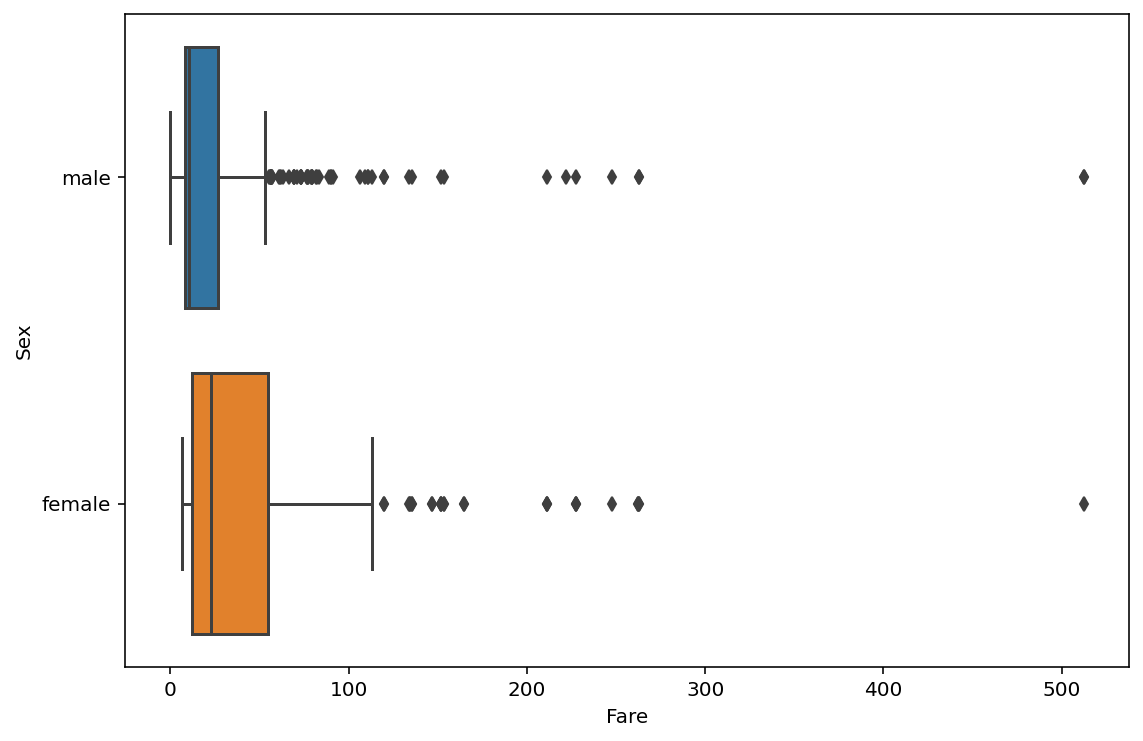

In [31]:
sns.boxplot(data=train, x='Fare', y='Sex')

In [32]:
train.groupby('Sex')['Pclass'].value_counts(normalize=True)

Sex     Pclass
female  3         0.458599
        1         0.299363
        2         0.242038
male    3         0.601386
        1         0.211438
        2         0.187175
Name: Pclass, dtype: float64

### Data prepare

In [33]:
y_train = train.Survived
train.drop('Survived', axis=1, inplace=True)

In [34]:
train.columns == test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [35]:
train['is_test'] = 0
test['is_test'] = 1

In [36]:
df = pd.concat([train, test])

In [37]:
df["isMale"] = df.Sex.replace({"male": 1, "female":0})
df.drop(["Sex", "Cabin", "Ticket", "Name", "PassengerId"], axis=1, inplace=True)

In [38]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [39]:
df_dummies = pd.get_dummies(df, columns=['Pclass', 'Embarked'])

In [40]:
df_dummies.head(10)

,Age,SibSp,Parch,Fare,is_test,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
5,NaN,0,0,8.4583,0,1,0,0,1,0,1,0
6,54.0,0,0,51.8625,0,1,1,0,0,0,0,1
7,2.0,3,1,21.0750,0,1,0,0,1,0,0,1
8,27.0,0,2,11.1333,0,0,0,0,1,0,0,1
9,14.0,1,0,30.0708,0,0,0,1,0,1,0,0


In [41]:
df_dummies.isnull().sum()

Age           263
SibSp           0
Parch           0
Fare            1
is_test         0
isMale          0
Pclass_1        0
Pclass_2        0
Pclass_3        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [42]:
X_train = df_dummies[df_dummies.is_test==0].drop('is_test', axis=1)
X_test = df_dummies[df_dummies.is_test==1].drop('is_test', axis=1)

In [43]:
columns = X_train.columns

In [44]:
X_train.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,35.0,1,0,53.1000,0,1,0,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,1,0,0,1
5,NaN,0,0,8.4583,1,0,0,1,0,1,0
6,54.0,0,0,51.8625,1,1,0,0,0,0,1
7,2.0,3,1,21.0750,1,0,0,1,0,0,1
8,27.0,0,2,11.1333,0,0,0,1,0,0,1
9,14.0,1,0,30.0708,0,0,1,0,1,0,0


### Fill nan

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [47]:
imputer.fit(X_train)

SimpleImputer()

In [48]:
X_train_imputed = imputer.transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=columns)

In [49]:
X_train_imputed.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1.0,0.0,7.2500,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.000000,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.000000,0.0,0.0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.000000,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.000000,0.0,0.0,8.0500,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,29.699118,0.0,0.0,8.4583,1.0,0.0,0.0,1.0,0.0,1.0,0.0
6,54.000000,0.0,0.0,51.8625,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,2.000000,3.0,1.0,21.0750,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,27.000000,0.0,2.0,11.1333,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,14.000000,1.0,0.0,30.0708,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### Standartization

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

In [52]:
scaler.fit(X_train_imputed)

StandardScaler()

In [53]:
X_train_imputed_scaled = scaler.transform(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns=columns)

In [54]:
X_train_imputed_scaled.head(10)

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,-0.592481,0.432793,-0.473674,-0.502445,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
1,0.638789,0.432793,-0.473674,0.786845,-1.355574,1.767767,-0.510152,-1.107926,2.074505,-0.307562,-1.614710
2,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
3,0.407926,0.432793,-0.473674,0.420730,-1.355574,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
4,0.407926,-0.474545,-0.473674,-0.486337,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
5,0.000000,-0.474545,-0.473674,-0.478116,0.737695,-0.565685,-0.510152,0.902587,-0.482043,3.251373,-1.614710
6,1.870059,-0.474545,-0.473674,0.395814,0.737695,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
7,-2.131568,2.247470,0.767630,-0.224083,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
8,-0.207709,-0.474545,2.008933,-0.424256,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
9,-1.208115,0.432793,-0.473674,-0.042956,-1.355574,-0.565685,1.960202,-1.107926,2.074505,-0.307562,-1.614710


In [55]:
X_test_imputed_scaled = scaler.transform(imputer.transform(X_test))

### Train and test data sampling from test

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train_fin, X_val, y_train_fin, y_val = train_test_split(X_train_imputed_scaled, y_train, test_size=0.2)

In [58]:
X_train_fin.shape

(712, 11)

In [59]:
X_val.shape

(179, 11)

In [60]:
X_test_imputed_scaled.shape

(418, 11)

In [61]:
y_train_fin.shape

(712,)

In [62]:
y_val.shape

(179,)

### Decision tree

In [63]:
y_train_fin.to_frame().min()

Survived    0
dtype: int64

In [64]:
X_train_fin

,Age,SibSp,Parch,Fare,isMale,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
119,-2.131568,3.154809,2.008933,-0.018709,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
101,0.000000,-0.474545,-0.473674,-0.489442,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
704,-0.284663,0.432793,-0.473674,-0.490280,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
11,2.177876,-0.474545,-0.473674,-0.113846,-1.355574,1.767767,-0.510152,-1.107926,-0.482043,-0.307562,0.619306
354,0.000000,-0.474545,-0.473674,-0.502949,0.737695,-0.565685,-0.510152,0.902587,2.074505,-0.307562,-1.614710
...,...,...,...,...,...,...,...,...,...,...,...
749,0.100109,-0.474545,-0.473674,-0.492378,0.737695,-0.565685,-0.510152,0.902587,-0.482043,3.251373,-1.614710
246,-0.361618,-0.474545,-0.473674,-0.491874,-1.355574,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
371,-0.900298,0.432793,-0.473674,-0.517631,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306
699,0.946606,-0.474545,-0.473674,-0.494391,0.737695,-0.565685,-0.510152,0.902587,-0.482043,-0.307562,0.619306


In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
trclf = DecisionTreeClassifier()

In [67]:
trclf.fit(X_train_fin, y_train_fin)

DecisionTreeClassifier()

In [68]:
trclf.predict(X_val)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0])

In [69]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(trclf, feature_names=None, class_names=None):
    print(export_graphviz(trclf, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [70]:
y_train_fin

119    0
101    0
704    0
11     1
354    0
      ..
749    0
246    0
371    0
699    0
619    0
Name: Survived, Length: 712, dtype: int64

In [71]:
str(y_train_fin)

'119    0\n101    0\n704    0\n11     1\n354    0\n      ..\n749    0\n246    0\n371    0\n699    0\n619    0\nName: Survived, Length: 712, dtype: int64'

In [72]:
get_tree_dot_view(trclf, list(X_train_fin.columns), ['0','1'])

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="isMale <= -0.309\ngini = 0.479\nsamples = 712\nvalue = [429, 283]\nclass = 0", fillcolor="#f6d4bc"] ;
1 [label="Pclass_3 <= -0.103\ngini = 0.389\nsamples = 261\nvalue = [69, 192]\nclass = 1", fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Fare <= -0.067\ngini = 0.092\nsamples = 145\nvalue = [7, 138]\nclass = 1", fillcolor="#43a2e6"] ;
1 -> 2 ;
3 [label="Fare <= -0.08\ngini = 0.175\nsamples = 62\nvalue = [6, 56]\nclass = 1", fillcolor="#4ea8e8"] ;
2 -> 3 ;
4 [label="Age <= 2.024\ngini = 0.15\nsamples = 61\nvalue = [5, 56]\nclass = 1", fillcolor="#4ba6e7"] ;
3 -> 4 ;
5 [label="SibSp <= -0.021\ngini = 0.126\nsamples = 59\nvalue = [4, 55]\nclass = 1", fillcolor="#47a4e7"] ;
4 -> 5 ;
6 [label="Age <= 0.562\ngini = 0.053\nsamples = 37\nvalue = [1, 36]\nclass = 1", fillcolor="#3ea0e6"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 26\nvalue = [0, 26]\nclass = 1", fillcolor="

 see grphs at http://www.webgraphviz.com

### Parameter significance

([<matplotlib.axis.YTick at 0x7fdda7cb6ee0>,
 [Text(0, 0, 'Age'),
  Text(0, 1, 'SibSp'),
  Text(0, 2, 'Parch'),
  Text(0, 3, 'Fare'),
  Text(0, 4, 'isMale'),
  Text(0, 5, 'Pclass_1'),
  Text(0, 6, 'Pclass_2'),
  Text(0, 7, 'Pclass_3'),
  Text(0, 8, 'Embarked_C'),
  Text(0, 9, 'Embarked_Q'),
  Text(0, 10, 'Embarked_S')])

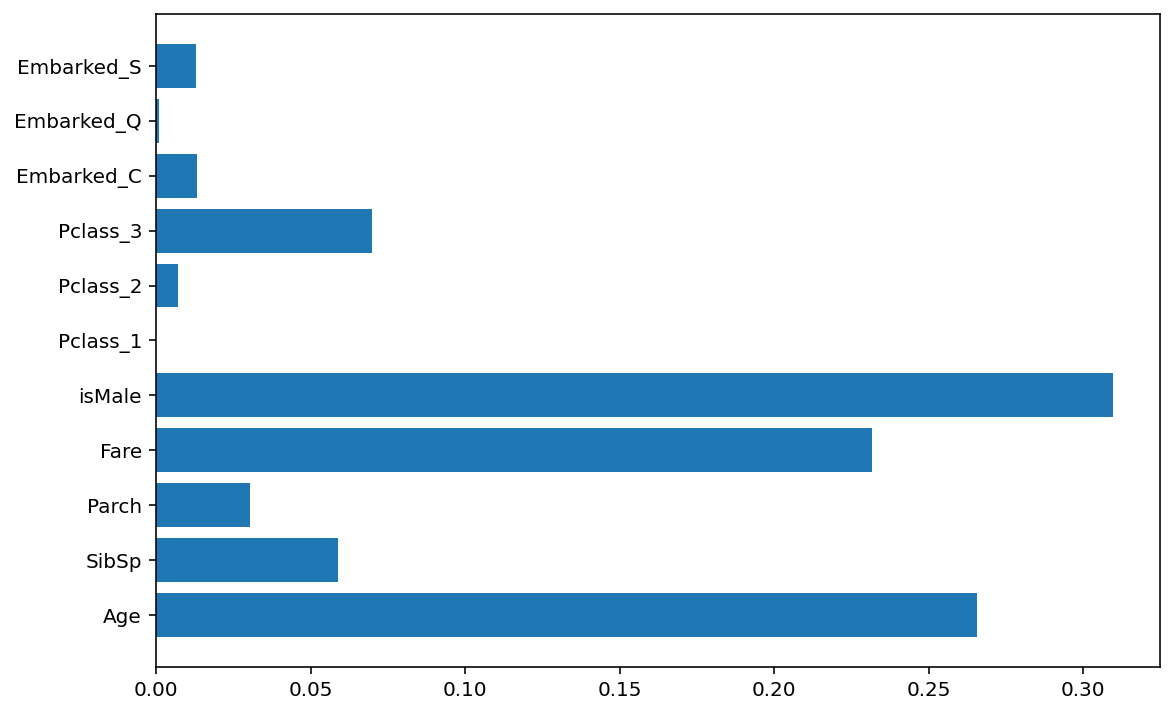

In [110]:
trclf = DecisionTreeClassifier()
trclf.fit(X_train_fin, y_train_fin)

plt.barh(np.arange(len(trclf.feature_importances_)), trclf.feature_importances_)
plt.yticks(np.arange(len(X_train_fin.columns)),X_train_fin.columns)

### Cross-validation for tree's depth

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
depths = np.arange(1,10)
#features_num = np.arange(5,15)
grid = {'max_depth': depths}#, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid, scoring='neg_log_loss', cv=5)

In [58]:
%%time
gridsearch.fit(X_train_fin, y_train_fin)

CPU times: user 215 ms, sys: 1.3 ms, total: 217 ms
Wall time: 216 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='neg_log_loss')

In [59]:
gridsearch.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [60]:
scores = [ -x for x in gridsearch.cv_results_.get('mean_test_score')]
scores

[0.5137067480182405,
 0.4702032355646481,
 0.5718554595664471,
 0.8434845410718624,
 1.1969652329186538,
 2.2792686389168795,
 2.942464181361674,
 3.865519840419227,
 4.743307031017824]

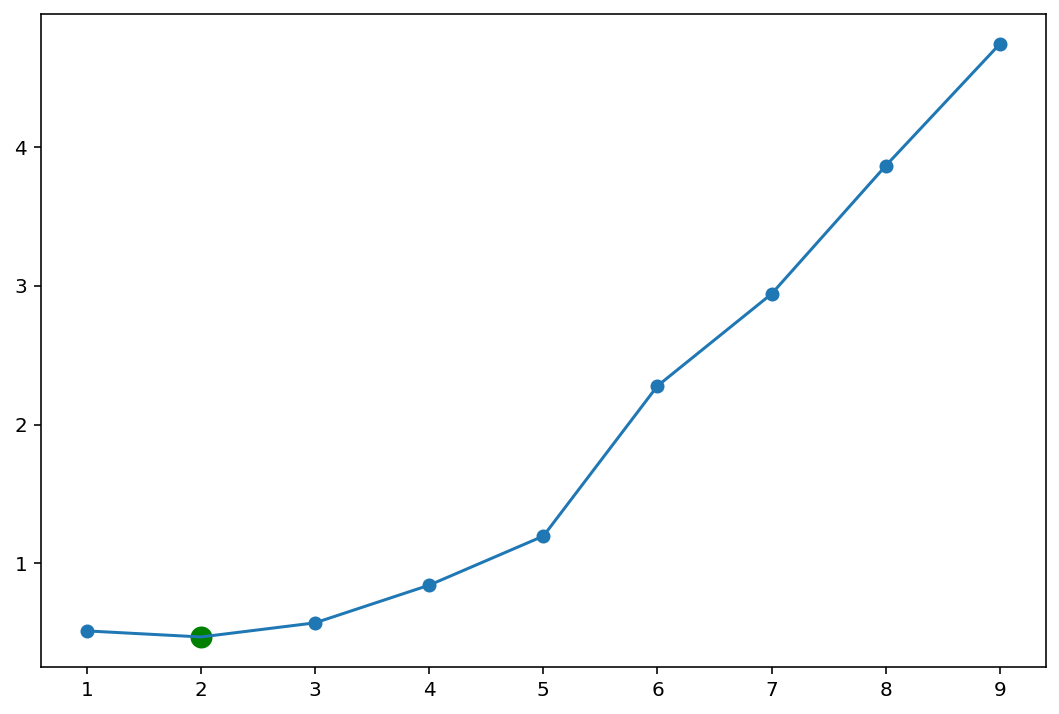

In [61]:
plt.plot(depths, scores)
plt.scatter(depths, scores)
best_point = np.argmin(scores)
plt.scatter(depths[best_point], scores[best_point], c='g', s=100)

The best tree's depth = 2

### Final predict

In [75]:
trclf_final = DecisionTreeClassifier(max_depth=2)

In [76]:
trclf_final.fit(X_train_fin, y_train_fin)

DecisionTreeClassifier(max_depth=2)

In [77]:
y_pred = trclf_final.predict(X_val)
y_pred_proba = trclf_final.predict_proba(X_val)

In [78]:
get_tree_dot_view(trclf_final, list(X_val.columns), ['0','1'])

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="isMale <= -0.309\ngini = 0.479\nsamples = 712\nvalue = [429, 283]\nclass = 0", fillcolor="#f6d4bc"] ;
1 [label="Pclass_3 <= -0.103\ngini = 0.389\nsamples = 261\nvalue = [69, 192]\nclass = 1", fillcolor="#80c0ee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.092\nsamples = 145\nvalue = [7, 138]\nclass = 1", fillcolor="#43a2e6"] ;
1 -> 2 ;
3 [label="gini = 0.498\nsamples = 116\nvalue = [62, 54]\nclass = 0", fillcolor="#fcefe5"] ;
1 -> 3 ;
4 [label="Age <= -1.862\ngini = 0.322\nsamples = 451\nvalue = [360, 91]\nclass = 0", fillcolor="#eca16b"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.388\nsamples = 19\nvalue = [5, 14]\nclass = 1", fillcolor="#80c0ee"] ;
4 -> 5 ;
6 [label="gini = 0.293\nsamples = 432\nvalue = [355, 77]\nclass = 0", fillcolor="#eb9c64"] ;
4 -> 6 ;
}


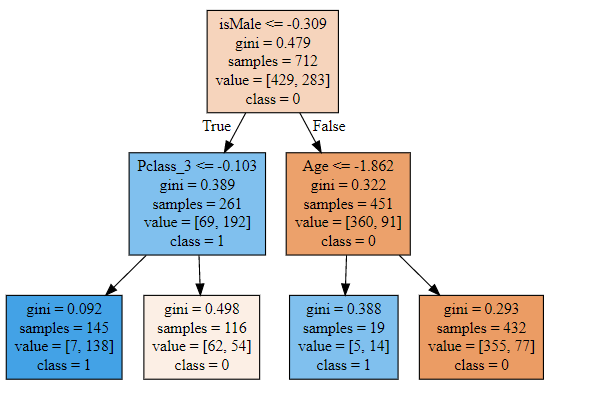

In [89]:
from sklearn import metrics

In [122]:
metrics.accuracy_score(y_val, y_pred)

0.7932960893854749

In [120]:
metrics.roc_auc_score(y_pred, y_pred_proba[:,1])

1.0

In [97]:
metrics.average_precision_score(y_pred, y_pred_proba[:,1])

1.0

In [107]:
len(test)

418

In [108]:
len(y_val)

179

In [124]:
trclf_final.fit(X_train_imputed_scaled, y_train)

DecisionTreeClassifier(max_depth=2)

In [125]:
y_pred_fin = trclf_final.predict(X_test_imputed_scaled)

In [126]:
y_pred_fin

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [127]:
test['Survived'] = y_pred_fin

In [132]:
test.set_index('PassengerId').iloc[:,-1].to_frame().to_csv('Submit.csv')